In [2]:
from astroquery.gaia import Gaia
# import functions as f
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [28]:
query_lmc = '''SELECT TOP 100000 \
source_id, ra, dec, parallax, phot_g_mean_mag, \
phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity \
FROM gaiadr3.gaia_source \
WHERE ra between 50.89 and 110.89 \
AND dec between -90.76 and -50.76 \
AND parallax IS NOT NULL \
AND pmra IS NOT NULL \
AND pmdec IS NOT NULL \
AND ruwe < 1.4 \
'''

job_lmc = Gaia.launch_job_async(query_lmc)
r_lmc = job_lmc.get_results()

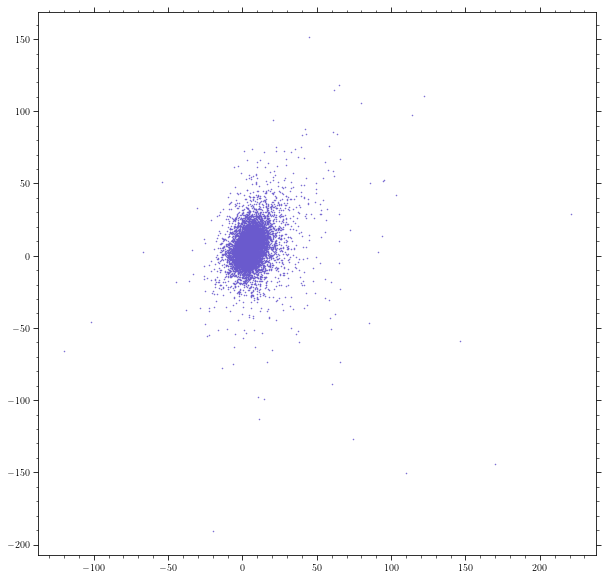

In [27]:
r_new = np.copy(r_lmc)
for i in range(0):
    clip = 3
    mean_ra = np.mean(r_new['pmra'])
    mean_dec = np.mean(r_new['pmdec'])
    vel = np.sqrt((r_new['pmra']-mean_ra)**2 + (r_new['pmdec']-mean_dec)**2)
    std_vel = np.std(vel, ddof=1)
    r_new = r_new[vel < clip*std_vel]
plt.figure(figsize=(10,10))
plt.plot(r_new['pmra'], r_new['pmdec'],'o', markersize=0.5, color='slateblue')
# plt.xlim(-20, 10)
# plt.ylim(-20, 10)